In [1]:
!pip install mne

In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt


In [2]:
# 定义BDF文件的路径
bdf_file_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf'

# 使用mne.io.read_raw_bdf函数读取BDF文件
raw = mne.io.read_raw_bdf(bdf_file_path, preload=True)



Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 103423  =      0.000 ...   201.998 secs...


In [3]:
# 打印EEG数据的基本信息
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-06-03 11:42:21 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>


In [8]:
%matplotlib widget

Effective window size : 4.000 (s)


Using matplotlib as 2D backend.


/var/folders/8h/6kht9rs15kd0_jl_jwkk7kfr0000gn/T/ipykernel_2807/510723517.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
/Users/mac/opt/anaconda3/envs/tf24/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


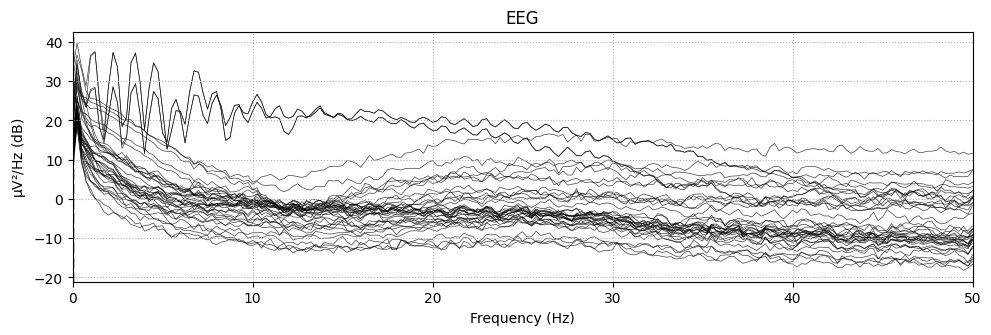

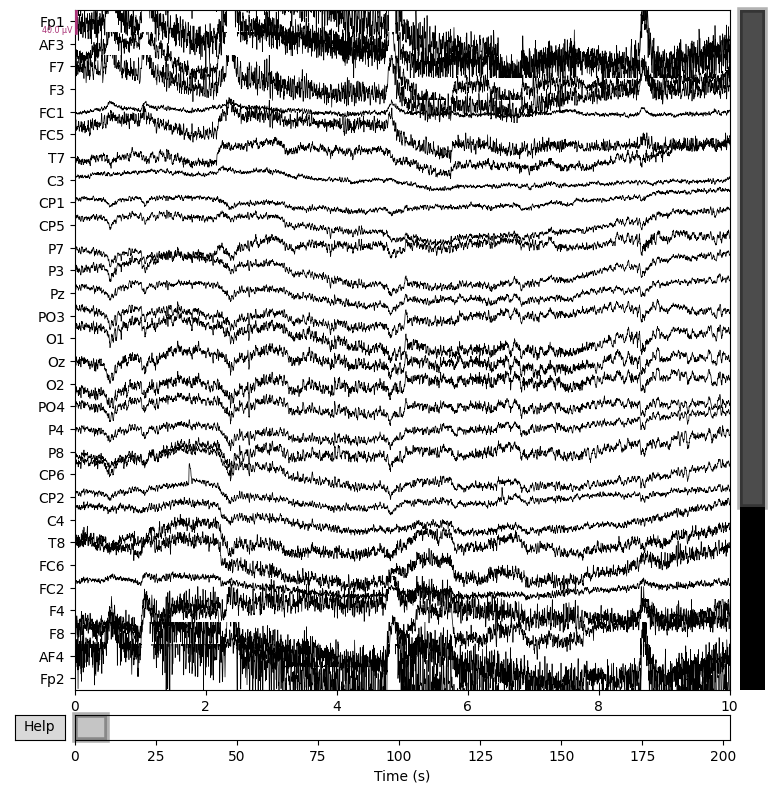

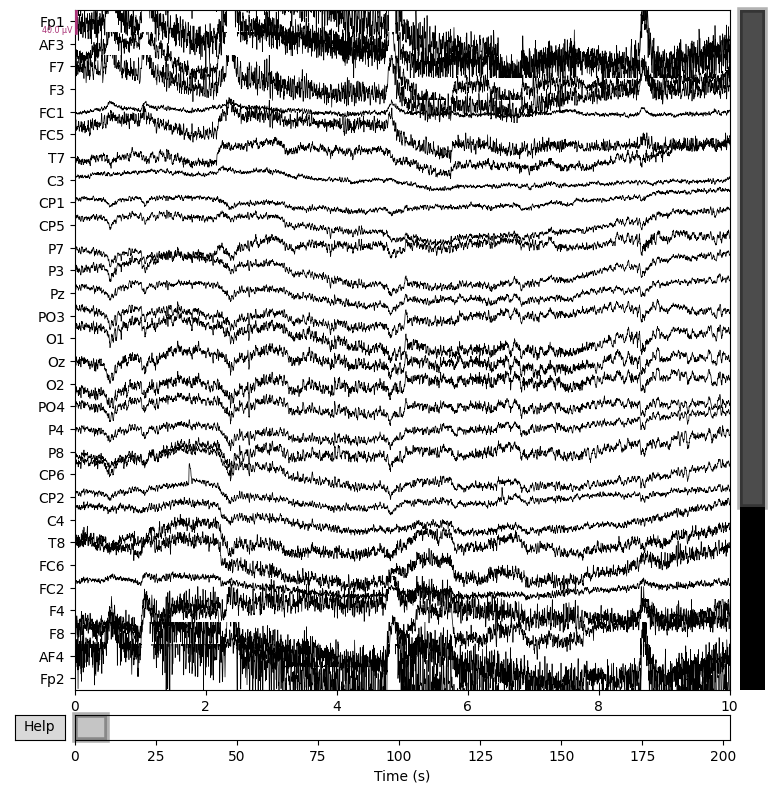

In [4]:
# 可以进一步进行数据分析和可视化
# 例如，绘制第一个通道的EEG数据
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=10, n_channels=30)

In [6]:
info = raw.info

In [7]:
print(info.keys())

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])


In [42]:
import os
# 定义文件夹路径
folder_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'
# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)
bdf_hc_files = []

# 获取文件夹中所有子文件夹的列表
sub_folders = os.listdir(folder_path)
# 遍历每个子文件夹
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder, 'ses-hc', 'eeg')#bdf文件的字文件夹路径
    # 判断路径是否存在
    if os.path.exists(sub_folder_path):
        file_names = os.listdir(sub_folder_path)
        for file in file_names:
            if file.lower().endswith('bdf'):
                bdf_file_path = os.path.join(sub_folder_path, file)#bdf文件的完整路径
                bdf_hc_files.append(bdf_file_path)

In [43]:
bdf_hc_files #标记为健康人的EGG数据集

['/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc31/ses-hc/eeg/sub-hc31_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf',
 '

In [44]:
import mne
import pandas as pd 
import matplotlib.pyplot as plt

In [50]:
#创建一个空的 dataFrame
eeg_hc_data_df = pd.DataFrame()

In [51]:
idx = 0
# 使用MNE库读取每个BDF文件
for bdf_file in bdf_hc_files:
    #bdf_file_path = os.path.join(folder_path, bdf_file)
    raw = mne.io.read_raw_bdf(bdf_file, preload=True)
    # #添加样本表示列
    # eeg_hc_data_df['sample_id'] = idx
    # 获取EEG数据并创建DataFrame
    eeg_data = pd.DataFrame(raw.get_data().T, columns=raw.ch_names)
    
    # 添加样本标识列
    eeg_data['sample_id'] = idx
    #用一个df来记录每一个bdf文件的数据，制作数据集，最后生成一个csv文件，用来深度学习
    #eeg_hc_data_df = pd.concat([eeg_hc_data_df, pd.DataFrame(raw.get_data().T)])
    eeg_hc_data_df = pd.concat([eeg_hc_data_df, eeg_data])
    idx += 1

    # 打印一些信息
    print(f"Processed {bdf_file}")

print("All BDF files processed.")

Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   180.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...
Processed /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf
Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.inf

In [47]:
raw.info


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-06-29 10:50:25 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>

In [52]:
testing = pd.DataFrame(raw.get_data().T)

In [53]:
eeg_hc_data_df.head()


,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Status,sample_id
0,-0.013113,-0.014438,-0.005971,-0.007889,-0.004374,-0.002647,-0.010407,-0.003088,-0.000211,-0.001623,...,-0.019162,-0.015725,-0.009223,-0.008193,-0.012147,-0.018262,-0.009640,0.000413,65536.0,0
1,-0.013115,-0.014432,-0.005964,-0.007892,-0.004374,-0.002650,-0.010409,-0.003090,-0.000212,-0.001625,...,-0.019166,-0.015739,-0.009234,-0.008194,-0.012144,-0.018257,-0.009641,0.000411,65536.0,0
2,-0.013112,-0.014421,-0.005953,-0.007891,-0.004371,-0.002649,-0.010406,-0.003089,-0.000209,-0.001621,...,-0.019160,-0.015731,-0.009239,-0.008187,-0.012131,-0.018243,-0.009634,0.000418,65536.0,0
3,-0.013109,-0.014420,-0.005947,-0.007886,-0.004369,-0.002646,-0.010400,-0.003088,-0.000207,-0.001619,...,-0.019158,-0.015714,-0.009233,-0.008182,-0.012109,-0.018223,-0.009628,0.000424,65536.0,0
4,-0.013104,-0.014417,-0.005947,-0.007882,-0.004368,-0.002642,-0.010396,-0.003086,-0.000207,-0.001617,...,-0.019157,-0.015710,-0.009223,-0.008180,-0.012088,-0.018205,-0.009634,0.000420,65536.0,0


In [54]:
eeg_hc_data_df.tail(3)

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Status,sample_id
100349,0.018465,0.016257,0.003300,0.017149,0.001693,0.005569,0.005284,0.008120,0.012104,0.011334,...,0.009271,0.017558,0.010922,0.006334,0.011201,-0.005073,0.011244,-0.004018,0.0,15
100350,0.018467,0.016257,0.003301,0.017150,0.001695,0.005570,0.005284,0.008119,0.012103,0.011333,...,0.009271,0.017553,0.010919,0.006335,0.011207,-0.005059,0.011241,-0.003983,0.0,15
100351,0.018472,0.016260,0.003302,0.017153,0.001696,0.005570,0.005283,0.008117,0.012101,0.011332,...,0.009277,0.017554,0.010916,0.006336,0.011209,-0.005045,0.011251,-0.003969,0.0,15


In [16]:
# 将EEG数据转换为NumPy数组
eeg_data_numpy = raw.get_data()

In [19]:
eeg_data_numpy.shape

(41, 103424)

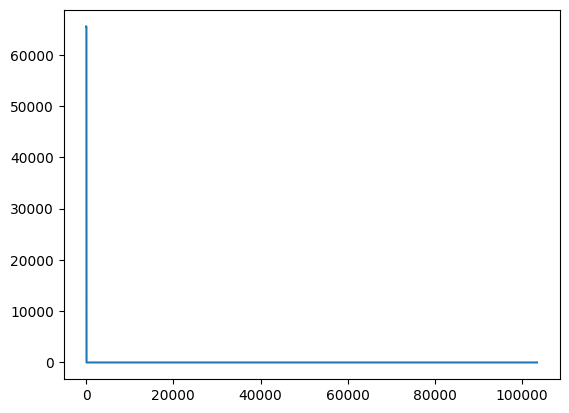

In [25]:
plt.plot(eeg_data_numpy[40])

In [27]:
type(eeg_data_numpy[0][3])

numpy.float64